<a href="https://colab.research.google.com/github/Morax19/ML_UCV/blob/main/Parcial2/Parcial_02_pregrado_2025_DanielHernandez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div><center><img src="https://ml.ucv.ai/logo.png\" width=150"/> </center></div>

# 02 Parcial teórico 2

## Aprendizaje Automático [UCV]


* Alumno: Daniel Hernández
* Cédula: 27795163
----


Fecha y Hora de entrega: **Lunes 17 de Marzo a las 11:59 pm**.
- Exámenes luego de la hora establecida no serán corregidos

El examen consta de dos secciones una teórica y una práctica.


Me interesa entender su comprensión de los temas por lo que el examen es 100% a libre a libro abierto pero debe justificar **todas** sus respuestas.

Si utilizó una referencia, coloque link (de ser online) o nombre de trabajo, autor/es y página (de ser una referencia escrita de libro o paper).
- De ser para la sección teórica, debe reescribir o parafrasear con sus propias palabras la sección que desea usar y porqué la usó en la pregunta.
- De ser para la sección práctica, comente lo más posible el código usado de un tercero.



# Preguntas teóricas (10 ptos)

## 1.1

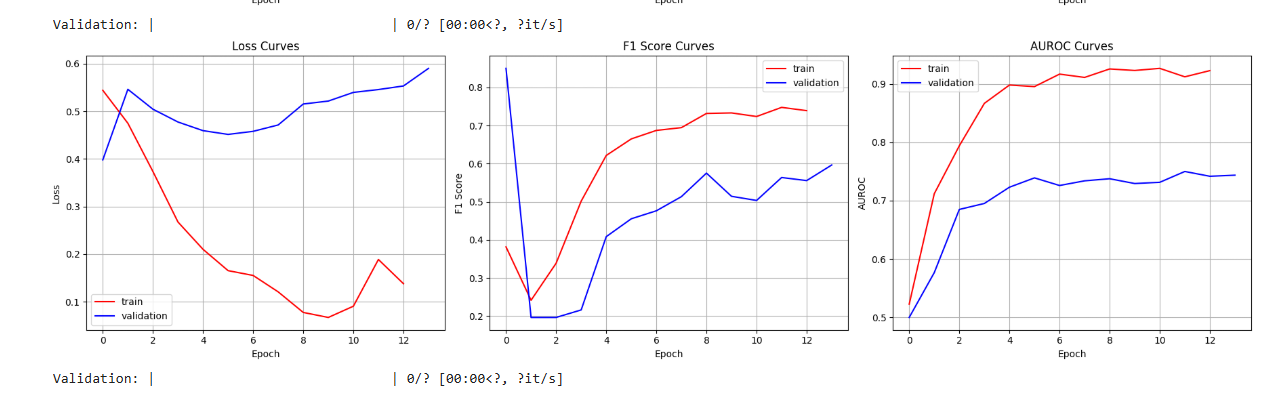

Un ejecutivo de su empresa recibe los siguientes resultados de un algoritmo de clasificación.

1. Explique detalladamente la funcionalidad de cada gráfico
1. Explique el rendimiento general del algoritmo de Clasificación
1. Identifique y explique qué fenómeno ocurre desde el punto de vista de aprendizaje
1. Cómo mitigaría/resolvería para mejorar el rendimiento?

### 1.1. Respuesta

1.1.1. Los gráficos presentados nos muestran el comportamiento de 3 diferentes métricas de un modelo, en común que el eje vertical respresenta el valor de la métrica y el eje horizontal las diferentes épocas o momentos en los que se calculó dicho valor:

  * Curvas de aprendizaje (Loss Curves): Nos indica como va cambiando la función de pérdida (o el error) durante el entrenamiento y validación del modelo a lo largo de las épocas.

  * Curvas F1 Score (F1 Score Curves): Nos muestra el valor del F1 Score de nuestro modelo en entrenamiento y validación durante las diferentes épocas que se tienen.

  * Curvas AUROC (AUROC Curves): Podemos ver el valor del AUC asociado a la curva ROC del modelo de clasificación durante el entrenamiento y la validación.

1.1.2. Basándonos en la primera gráfica podemos ver que el error de entrenamiento disminuye a medida que avanzan las épocas, al menos hasta llegar a la 9, a partir de esta hay un pico que disminuye pasada la época 11, el error de entrenamiento finaliza con un valor aproximado de 0,15 (época 12). Si nos fijamos en la curva de validación, podemos ver que el error de validación disminuye desde la época 1 hasta la 5, a partir de aquí, comienza a aumentar hasta finalizar en la época 13 con un valor de casi 0,6 (época 13).

En la segunda gráfica podemos observar que el F1 score con los datos de entrenamiento aumenta mucho más rápido en comparación a los datos de validación, posteriormente se estabiliza en la época 4 y 5, posteriormente sigue aumentando pero no al mismo ritmo lo que sugiere que el modelo podría haber llegado a un punto "óptimo" y al finalizar se obtiene un F1 Score un poco mayor que 0,7 (época 12). Si vemos la curva de validación, al principio tiene un aumento bastante lento (épocas 1, 2 y 3), luego crece bastante rápido hasta la época 4, y aunque sigue aumentando, disminuye el ritmo hasta llegar a la época 8, igual que durante el entrenamiento, a partir de aquí el valor comienza a oscilar entre 0,5 y 0,6 sin crecer demasiado rápido, al finalizar obtenemos un F1 Score de validación de 0,6 (época 13).

Para el último gráfico, podemos observar como el AUC de entrenamiento se comporta de forma esperada, es decir, va aumentando a medida que las épocas avanzan y al finalizar es un valor cercano a 1; por otro lado, el AUC de la curva de validación aumenta de forma más lenta y se mantiene un poco mayor a 0,7 a medida que avanzan las épocas, al finalizar tenemos un valor apróximadamente de 0,75 o quizás un poco menor.

En general, nuestro algoritmo de clasificación no está generalizando de forma correcta, esto queda claro viendo que en el primer caso, el error de entrenamiento es bastante cercano a 0 mientras que el de validación es mayor a 0,5. En el segundo caso, vemos que el F1 Score de entrenamiento se separa bastante del de validación, siendo este menor, y en el último caso se puede ver que el AUC de entrenamiento es bastante cercano a 1, lo que sugiere un buen rendimiento, sin embargo el de validación es poco mayor a 0,7 el cual está más cerca del rendimiento de un clasificador aleatorio que el rendimiento deseado.

1.1.3. El fenómeno que afecta nuestro modelo desde el punto de vista del aprendizaje es el sobreajuste, podemos concluir por las respuestas a las preguntas anteriores que el rendimiento del modelo en datos de entrenamiento es correcto pero al momento de operar con datos de validación, este decae bastante lo que implica que no hay una buena generalización, es decir, el modelo está memorizando los datos de entrenamiento en lugar de aprender los patrones de los mismos.

1.1.4. Para solucionar el problema del sobreajuste se deben revisar los datos de entrada del modelo, quizás estamos asignando pocos datos para validación al momento de dividir nuestro conjunto de datos. Adicional a esto, podríamos aplicar técnicas de regularización dependiendo del tipo de modelo con el que estemos trabajando, pero aumentar el sesgo en nuestros datos de entrenamiento puede ayudar a que el modelo mejore su rendimiento al momento de generalizar datos nuevos y así corregir los problemas presentes en validación.

## 1.2

Considere el siguiente código escrito en PyTorch

In [ ]:
import torch
import torch.nn as nn


class ModeloSimple(nn.Module):
    def __init__(
        self,
        z,
        w,
        y
    ):
        super(ModeloSimple, self).__init__()
        self.fc1 = nn.Linear(
            in_features=y,
            out_features=z
        )
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(
            in_features=z,
            out_features=w
        )

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

Modifique el código y substituya las variables y, w, y z por las variables de entrada, salida y capas ocultas. Además, agregue la opción de usar como función de activación además de la presentada la tangente hiperbólica.

### 1.2. Respuesta

El código modificado se presenta en la celda siguiente, se asume que el objetivo es añadir la opción de escoger que función de activación utilizar, siendo $ReLU$ y $Tanh$ las alternativas.

In [ ]:
import torch
import torch.nn as nn

class ModeloSimple(nn.Module):
    def __init__(
        self,
        inputData,        #y
        hiddenLayerData,  #z
        outputData,       #w
        actFunction = 'relu'

    ):
        super(ModeloSimple, self).__init__()
        self.fc1 = nn.Linear(
            in_features=inputData,        #y
            out_features=hiddenLayerData  #z
        )

        if actFunction.lower() == 'relu':
          self.activation = nn.ReLU()
        elif actFunction.lower() == 'tanh':
          self.activation = nn.Tanh()
        else:
          raise ValueError("Error: Use 'relu' o 'tanh' como actFunction.")

        self.fc2 = nn.Linear(
            in_features=hiddenLayerData,  #z
            out_features=outputData       #w
        )

    def forward(self, x):
        x = self.fc1(x)
        x = self.activation(x)
        x = self.fc2(x)
        return x

Si lo que se desea es hacer uso de $Tanh$ además de $ReLU$, es decir, usar ambas funciones y asumiendo que el orden es primero $ReLU$ y luego $Tanh$, el código resultante sería el siguiente:

In [ ]:
import torch
import torch.nn as nn

class ModeloSimple(nn.Module):
    def __init__(
        self,
        inputData,        #y
        hiddenLayerData,  #z
        outputData       #w
    ):
        super(ModeloSimple, self).__init__()
        self.fc1 = nn.Linear(
            in_features=inputData,        #y
            out_features=hiddenLayerData  #z
        )

        self.relu = nn.ReLU()
        self.tanh = nn.Tanh()

        self.fc2 = nn.Linear(
            in_features=hiddenLayerData,  #z
            out_features=outputData       #w
        )

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu()
        x = self.tanh()
        x = self.fc2(x)
        return x

## 1.3

Supongamos que modificamos la función de activación $f_i$ en las neuronas de la capa oculta de una red neuronal a la siguiente expresión:

$$f_i(x, y) = a_i x + b_i y + c_i \text{ con } i \in \{1,2, 3\}$$

La estructura de la red tiene 2 capas de entrada 1 capa oculta con 3 neuronas y 1 salida.

1. Escriba el diagrama de la red.
1. Qué particularidad tiene la función resultante?

### 1.3. Respuesta

Para responder a este item, voy a desarrollar la función de activación $f_i$ de forma que tenemos:

$f_1(x, y) = a_1x + b_1y + c_1$

$f_2(x, y) = a_2x + b_2y + c_2$

$f_3(x, y) = a_3x + b_3y + c_3$

1.3.1. El diagrama de red resultante sería el siguiente:

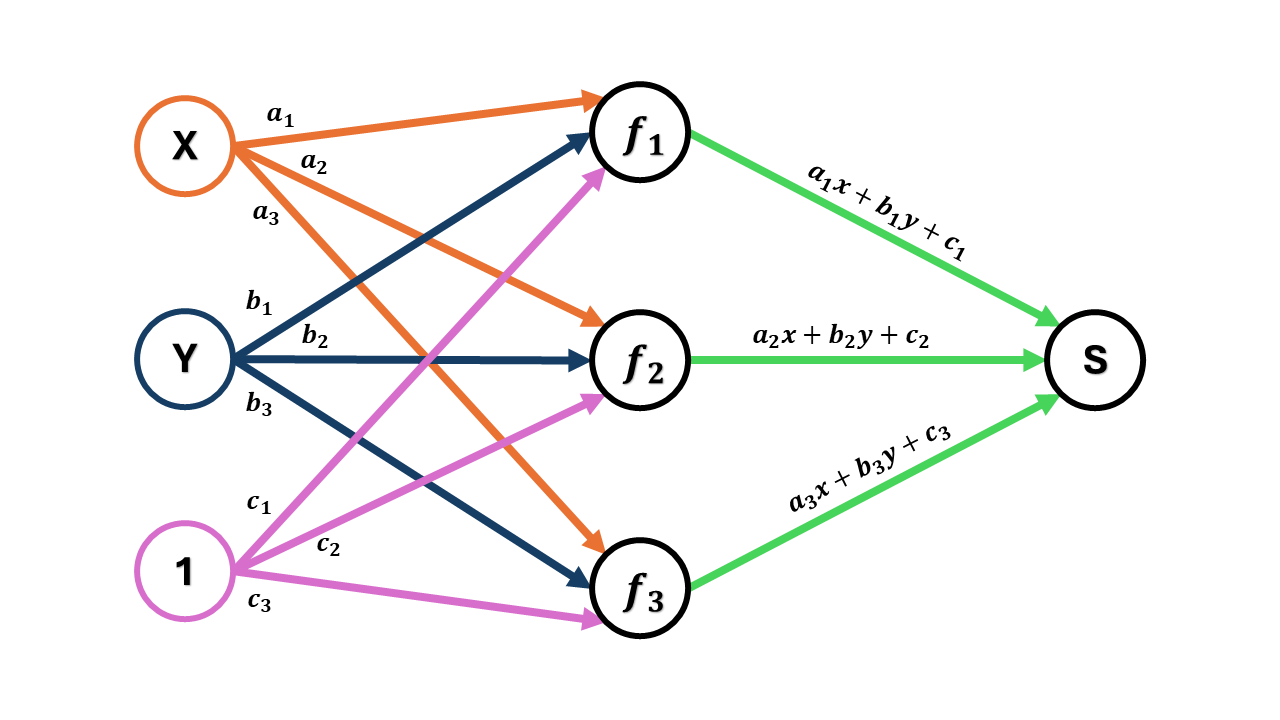

1.3.2. La función obtenida es una función lineal, ya que nuestras entradas solo se ven multiplicadas por un escalar $a_i$ en el caso de $x$ y $b_i$ en el caso de $y$ y se les suma un sesgo $c_i$, esto implica que nuestro modelo tendrá dificultad para aprender patrones de datos que no son linealmente separables.

## 1.4

Supongamos que tenemos cuatro centroides y estamos usando K-medias con distancia euclideana.

Los centroides son: $$c_1 = \begin{pmatrix} 1 \\ 0 \\ 2 \\ -4 \end{pmatrix},
c_2 = \begin{pmatrix} 10 \\ 1 \\ -4 \\ -4 \end{pmatrix}, c_3 = \begin{pmatrix} 5 \\ 6 \\ 1 \\ 0 \end{pmatrix}, c_4 = \begin{pmatrix} 2 \\ 10 \\ 2 \\ -8 \end{pmatrix}
$$



Asigne los siguientes puntos a cada clúster:

1. $$p_1 = \begin{pmatrix} 1.5 \\ -0.5 \\ 2.9 \\ -2.5 \end{pmatrix} $$
1. $$p_2 = \begin{pmatrix} 13 \\ 0 \\ -3.6 \\ -9 \end{pmatrix}$$
1. $$p_3 = \begin{pmatrix} 50 \\ -2 \\ 10 \\ -5 \end{pmatrix}$$
1. $$p_4 = \begin{pmatrix} -2 \\ -10 \\ -2 \\ 8 \end{pmatrix} $$


### 1.4  Respuesta

Para responder a esta pregunta, haremos uso de la distancia euclideana entre los puntos correspondientes y los centroides disponibles para la asignación:

In [35]:
def euclideanDistance(pt1, pt2):
  sumaDiffDuadrados = sum((x - y) ** 2 for x, y in zip(pt1, pt2))
  return sumaDiffDuadrados ** 0.5

centroids = [
    (1, 0, 2, -4),
    (10, 1, -4, -4),
    (5, 6, 1, 0),
    (2, 10, 2, -8)
]

points1 = [
    (1.5, -0.5, 2.9, -2.5),
    (13, 0, -3.6, -9),
    (50, -2, 10, -5),
    (-2, -10, -2, 8)
]

ansList = []
distance = []

for p in points1:
  for c in centroids:
    distance.append(euclideanDistance(p, c))
  ansList.append(centroids[distance.index(min(distance))])
  distance.clear()

for i in range(4):
  print(f"El punto: {points1[i]}\nPertenece al centroide: {ansList[i]}\n")

El punto: (1.5, -0.5, 2.9, -2.5)
Pertenece al centroide: (1, 0, 2, -4)

El punto: (13, 0, -3.6, -9)
Pertenece al centroide: (10, 1, -4, -4)

El punto: (50, -2, 10, -5)
Pertenece al centroide: (10, 1, -4, -4)

El punto: (-2, -10, -2, 8)
Pertenece al centroide: (1, 0, 2, -4)



## 1.5

Asumiendo el escenario anterior de 1.5 responda las siguientes preguntas:



- Si tuviesen que identificar 1 valor extremo (outlier) cómo harían?
- Realice una iteración para refrescar los centros $c_i$.
- Bajo qué escenario tendría sentido usar la distancia de Manhattan en K-medias? Qué habría que modificar?





### 1.5  Respuesta

1.5.1. Podemos identificar puntos extremos (outliers) si la distancia calculada para un punto es muy grande, es decir, un punto que se aleja demasiado de los centroides. Para definir esto, puede ser necesario definir un umbral que nos permita decidir cuando consideramos una distancia muy grande.

1.5.2. Para esto, actualizaremos las coordenadas de $c_1$ y $c_2$ ya que fueron los que usamos para clasificar los puntos anteriores.

In [ ]:
def updateCentroid(pt1, pt2):
  newCi = ()
  for x, y in zip(pt1, pt2):
    newP = (x + y)/2
    newCi = newCi + (newP,)
  return newCi

newC1 = updateCentroid(points[0], points[3])
newC2 = updateCentroid(points[1], points[2])

print(f"C1 actualizado: {newC1}")
print(f"C2 actualizado: {newC2}")

C1 actualizado: (-0.25, -5.25, 0.44999999999999996, 2.75)
C2 actualizado: (31.5, -1.0, 3.2, -7.0)


1.5.3. Al momento de estar trabajando con K-Medias, la distancia Manhattan es útil cuando nuestros datos tienen muchas variables categóricas, o cuando usamos métodos que convierten esas variables en binarias (como el OneHotEncoder), ya que la distancia Manhattan es menos sensible a la magnitud de los datos, por esta razón también se suele recomendar su uso si nuestro conjunto de datos tiene muchos outliers. Por último, también depende del contexto de nuestros datos, ya que la distancia Manhattan suele usarse con datos que pueden estar representados en celdas, o matrices, como pueden ser las imágenes o puntos en una ciudad.

## 1.6

Imaginen que tenemos un modelo de clasificación con dos clases y aumentamos el umbral de clasificación. Qué sucede con la sensibilidad (TRP) del modelo?

1. Se puede mantener igual.
1. Siempre se mantiene constante ya que el umbral no afecta la sensibilidad.
1. La sensibilidad puede disminuir.
1. La sensibilidad puede aumentar.

Mencione un caso hipotético donde disminuir la sensibilidad tenga sentido.

### 1.6  Respuesta

Teniendo en cuenta que al aumentar el umbral nos referimos a llevar su valor lo más cercano a 1, visualmente sería desplazar el umbral de izquierda a derecha, además de esto es importante recordar que la **sensibilidad (TRP)** se define como: VP ÷ P.

Además debemos definir:
* **Verdadero positivio (VP):** Predicciones clasificadas como positivas y realmente lo son.
* **Falso positivo (FP):** Predicciones que pertenecen a la clase negativa pero se clasificaron como positivas.
* **Falso negativo (FN):** Predicciones que pertenecen a la clase positiva pero se clasificaron como negativas.
* **Verdadero negativo (VN):** Predicciones clasificadas como negativas y realmente pertenecen a esta clase.
* **Positivo (P):** El total de datos que pertenecen a la clase positiva.
* **Negativo (N):** El total de datos que pertenecen a la clase negativa.

Por lo tanto se tiene que:

1. Si, se puede mantener igual, ya que esto depende del punto que quede a la derecha del umbral, si este punto pertenece a la clase negativa pasa de ser un FP a un VN y esto no modifica de ninguna forma la sensibilidad.

2. Es falso, el umbral modifica la clasificación de los datos entre VN, FN, FP y VP, si vemos la definición de sensibilidad, esta depende de dicha clasificación.

3. Es cierto, la sensibilidad puede disminuir, ya que si tomamos el caso incial, es decir, con el valor del umbral en 0, todas nuestras predicciones son positivas, por lo tanto todas los datos que son realmente positivos se encuentran correctamente clasificados, haciendo que la sensibilidad sea igual a 1 (VP = P). A medida que movemos el umbral a la derecha, la sensibilidad puede disminuir cuando los datos VP se conviertan en FN.

4. Esto es falso, por lo explicando en el ítem anterior, al aumentar el umbral, la sensibilidad ya se encuentran en su valor más alto (1) debido a que todos los puntos VP se encuentran clasificados correctamente, a medida que el umbral aumente, solo tendremos puntos FP que pasen a ser VN o puntos VP que pasen a ser FN, por lo que la sensibilidad pueden mantenerse o disminuir, no aumentar.

Para **disminuir** la sensibilidad debemos aumentar el umbral de clasificación de nuestro modelo, esto hará que nuestro modelo sea más estricto al asignar instancias a la clase positiva, en consecuencia es probable que aumente la cantidad de falsos negativos y disminuyan los falsos positivos. Esto tendría sentido en aplicaciones donde los falsos positivos sea muy costosos o si nuestro conjunto de datos está desbalanceado y hay poca cantidad de instancias verdaderamente positivas.

Por ejemplo, si estamos clasificando pacientes con cáncer o sin cáncer, clasificar de manera errónea a un paciente sano como enfermo pueden llevar a que este reciba quimioterapias sin ninguna necesidad, implicando gastos o peor aún, un deterioro en su salud.

## 1.7 Pregunta parcial 1

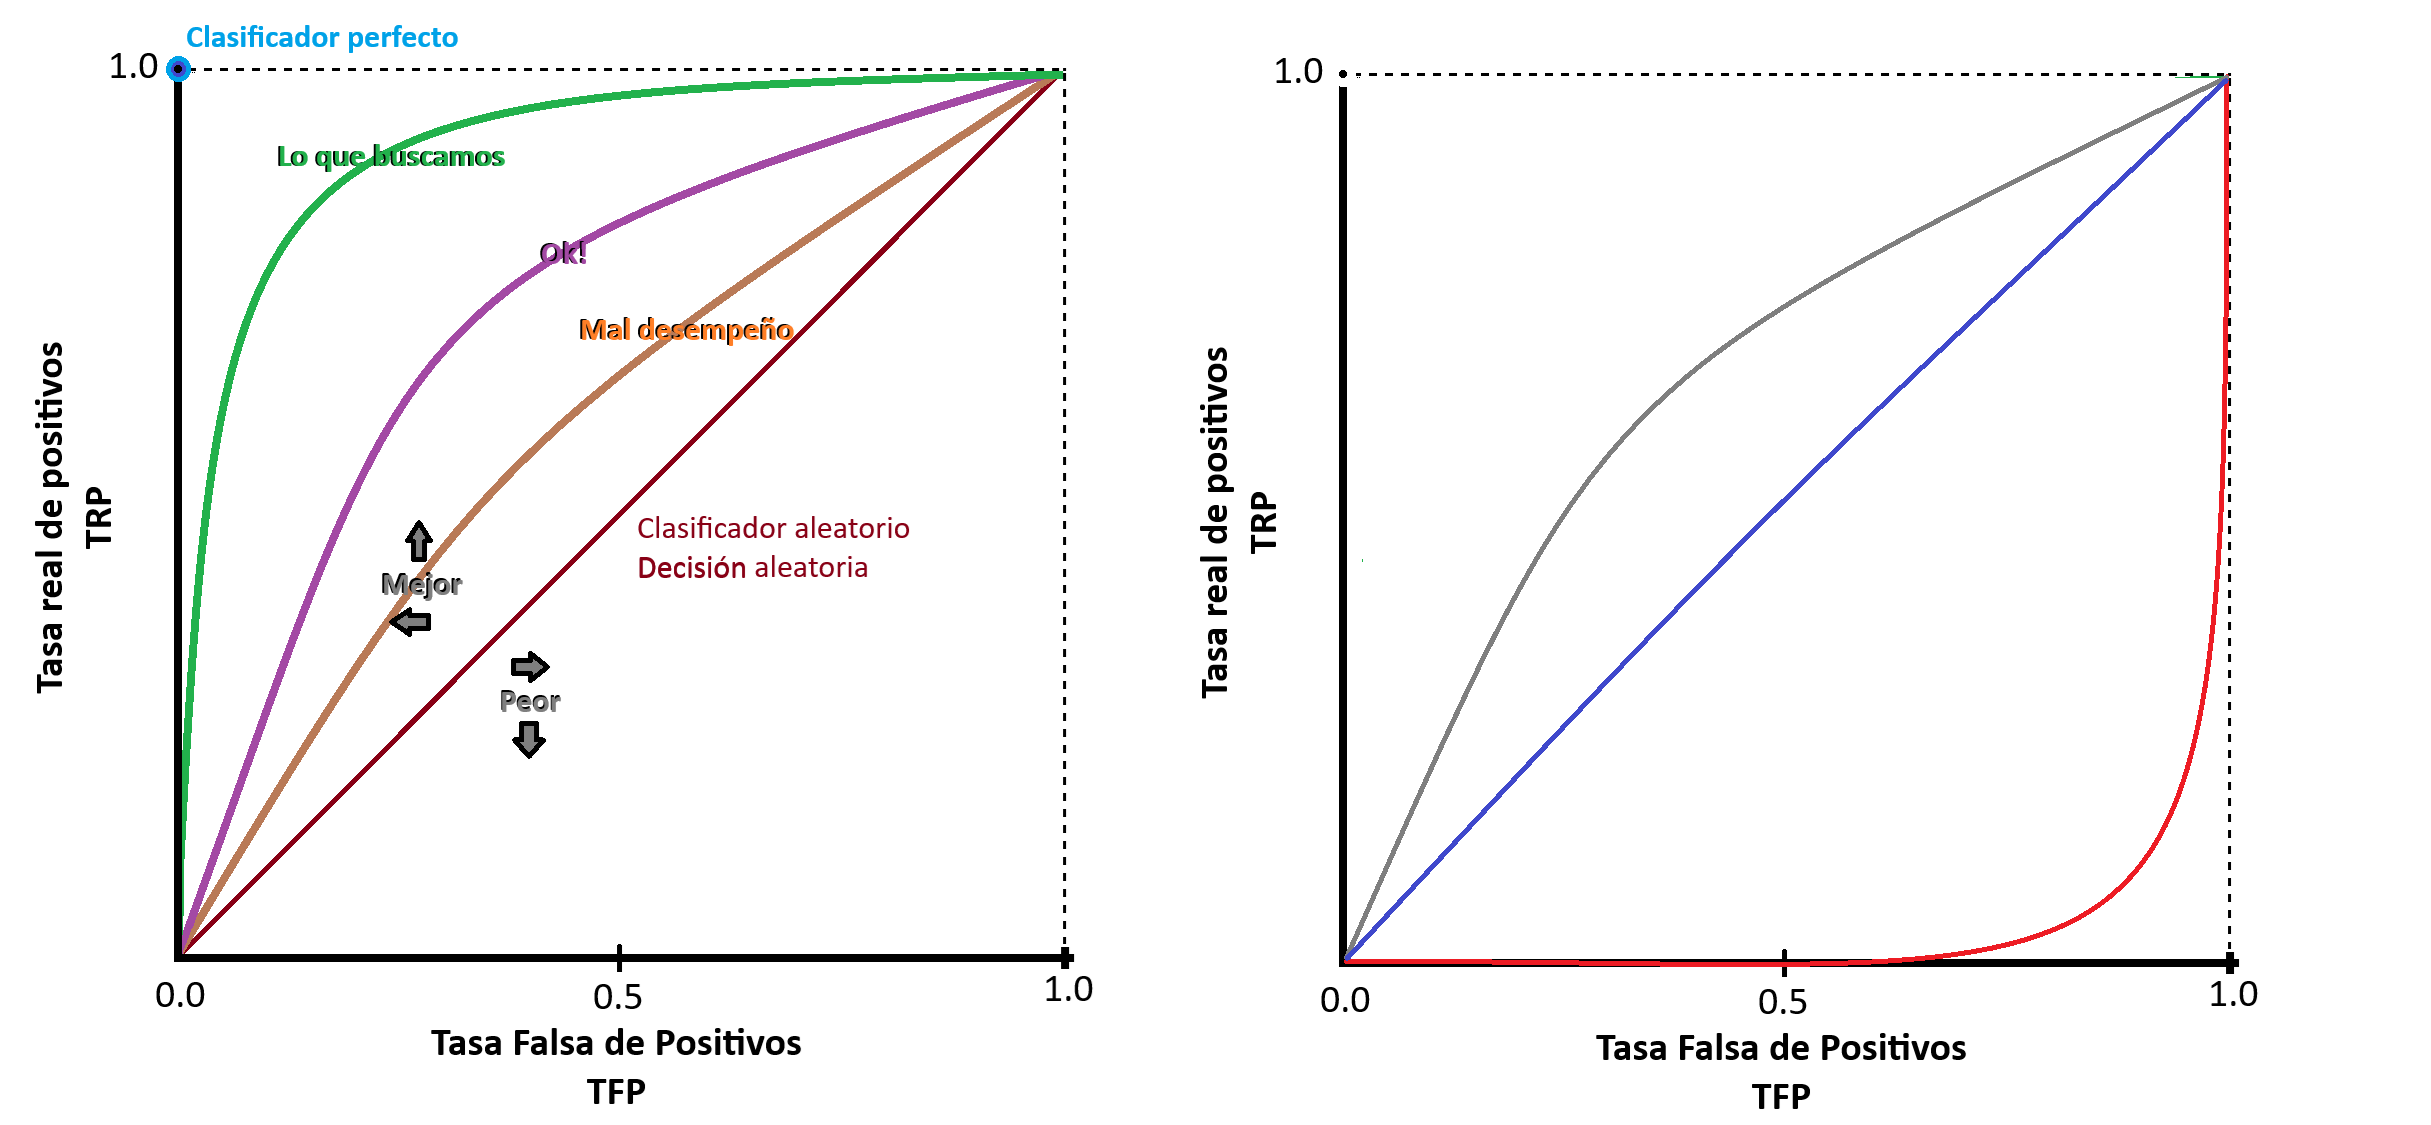

1. Por qué comparamos la Curva ROC con la línea TRP = TFP?
1. Por qué la llamamos decisión aleatoria?
1. En la curva ROC de la derecha, cuál de los tres modelos escogerían y por qué?
1. Dependiendo de la respuesta en 3. Qué habría que modificar en el modelo ganador?


### 1.7  Respuesta

1. Esta línea representa lo que conocemos como clasificador aleatorio, es decir, nuestro modelo asigna los datos a cualquiera de las 2 clases sin tener en cuenta ningún tipo de información. Se compara la curva ROC con este clasificador porque es el que tiene el peor rendimiento posible, por lo tanto, se usa como caso base para saber que tan diferente al peor caso posible estamos clasificando.

2. Porque al momento de clasificar un nuevo dato, se tiene la misma probabilidad de asignación para las 2 clases, también se puede ver como que por cada punto que calsificamos correctamente existe otro que clasificamos de forma incorrecta.

3. Se escoge el modelo de color rojo, porque es el que tiene un rendimiento más alejado de la clasificación aleatoria.

4. Se deben invertir las clases o los valores de las predicciones, de esta forma obtendremos el rendimiento deseado.

## 1.8

Si tenemos dos modelos $M_1$ y $M_2$ entrenados en los mismos datos con los mismos splits. Dados los siguientes escenarios:

1. Si $M_2$ tiene mejor precisión que $M_1$ entonces $M_2$ funciona mucho mejor que $M_1$
1. Si $M_2$ tiene peor precisión y peor sensibilidad que $M_1$ entonces con alta probabilidad funciona peor que $M_1$
1. Si $M_2$ tiene peor sensibilidad que $M_1$ entonces $M_1$ funciona mucho mejor que $M_2$
1. Si $M_1$ tiene mejor precisión y mejor sensibilidad que $M_2$ entonces con alta probabilidad funciona peor que $M_2$

### 1.8  Respuesta

Para responder a esta pregunta debemos tener en cuenta a que nos referimos con precisión y sensibilidad:

* Precisión: Es la proporción de los valores clasificados correctamente (en cualquiera de las 2 clases) entre el total de datos disponibles. Matmáticamente se define de la siguiente forma: $\frac{VP + VN}{P + N}$

* Sensibilidad (recall): Mide la proporción de valores clasificados como positivos entre todos los que pertenecen a dicha clase, es decir, del total de valores pertenecientes a la clase positiva, cuantos han sido identificados correctamente. Matemáticamente se define como: $\frac{VP}{P}$

Por lo tanto, se tiene que las opciones correctas para responder a esta pregunta son:

2. Si $M_2$ tiene peores valores para la precisión y la sensibildad en comparación con $M_1$ quiere decir que, de todas las instancias positivas $M_2$ logra identificar una menor cantidad en comparacion a $M_1$ (recall), de igual forma para la precisión, el hecho de que $M_2$ tenga un puntaje más bajo que $M_1$ quiere decir que se cometieron mas errores al momento de clasificar los datos en algunas de las clases.

## 1.9

Suponga tiene los siguientes puntos:

A: (2, 10, 3, 7)
B: (2, 5, 6, 1)
C: (8, 4, 9, 3)
D: (5, 8, 2, 4)
E: (7, 5, 6, 2)
F: (6, 4, 8, 5)
G: (9, 9, 4, 6)
H: (1, 3, 7, 9)

1. Explique paso a paso cómo se modifica la matriz de distancias al usar el algoritmo de agrupamiento jerárquico con distancia euclidiana como métrica de distancia y el enlace mínimo como criterio de enlace.
1. Grafique el dendrograma resultante.
1. Cuándo es útil este enfoque?


### 1.9 Respuesta



1.9.1. Para responder a este item, debemos saber que el agoritmo de agrupamiento jerárquico consiste en tomar un grupo de clusters y calcular la distancia (en este caso usando la distancia euclideana) entre ellos, hallar un par de clusters que, como estamos usando enlace mínimo como método de enlace, contengan un par de puntos con distancia mínima para unirlos y generar un nuevo cluster, posterior a esto el proceso se repite hasta que solo tengamos 1 cluster.

Puntos en esta iteracion:
 [[ 2 10  3  7]
 [ 2  5  6  1]
 [ 8  4  9  3]
 [ 5  8  2  4]
 [ 7  5  6  2]
 [ 6  4  8  5]
 [ 9  9  4  6]
 [ 1  3  7  9]]



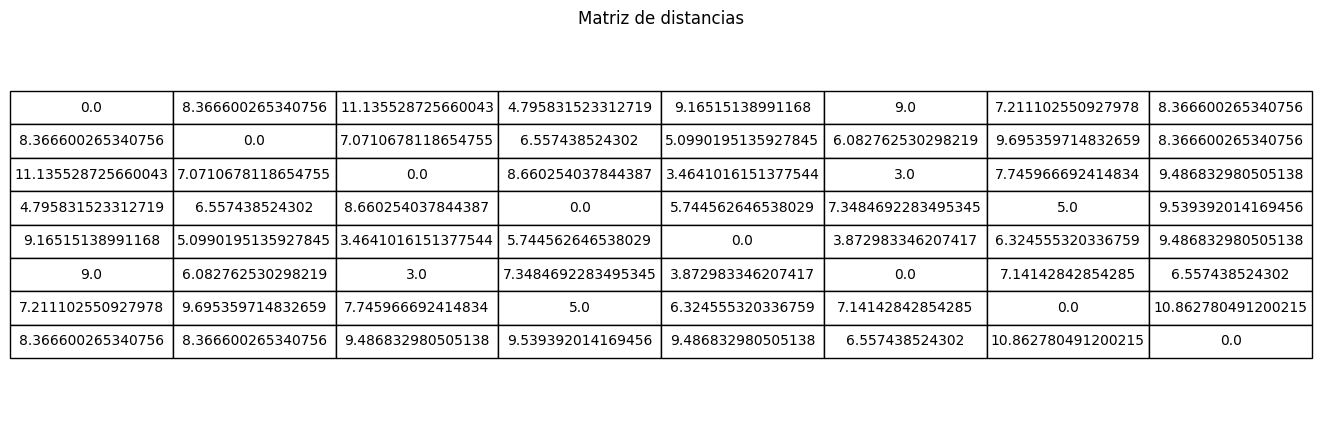


Puntos en esta iteracion:
 [[ 2.  10.   3.   7. ]
 [ 2.   5.   6.   1. ]
 [ 5.   8.   2.   4. ]
 [ 7.   5.   6.   2. ]
 [ 9.   9.   4.   6. ]
 [ 1.   3.   7.   9. ]
 [ 7.   4.   8.5  4. ]]



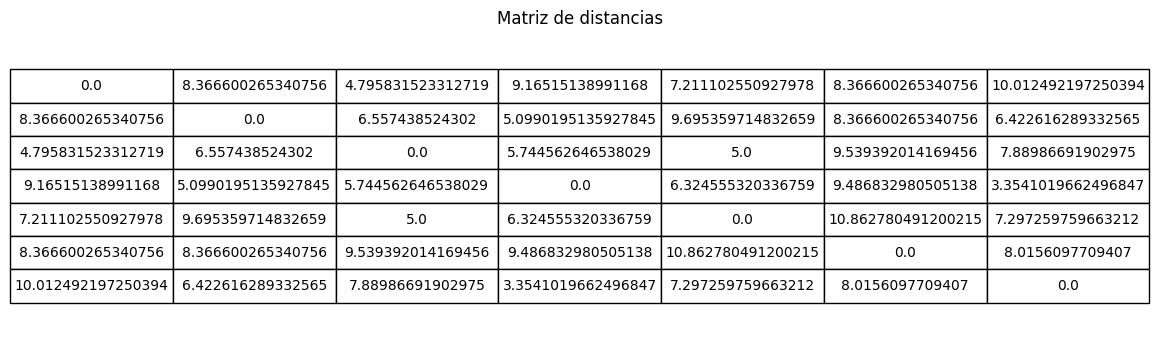


Puntos en esta iteracion:
 [[ 2.   10.    3.    7.  ]
 [ 2.    5.    6.    1.  ]
 [ 5.    8.    2.    4.  ]
 [ 9.    9.    4.    6.  ]
 [ 1.    3.    7.    9.  ]
 [ 7.    4.5   7.25  3.  ]]



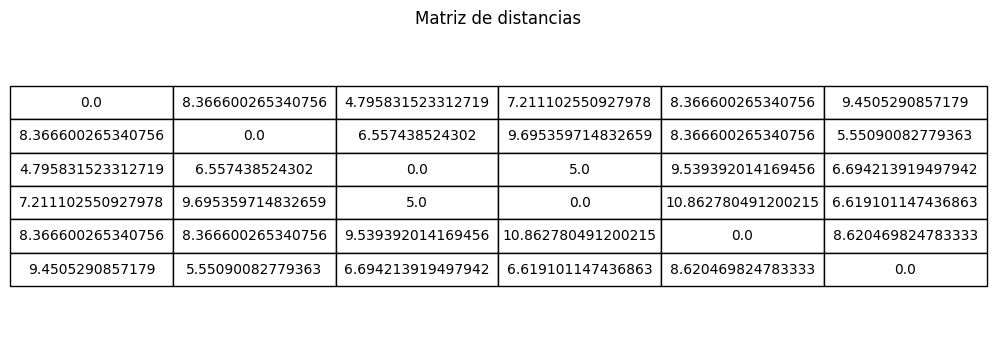


Puntos en esta iteracion:
 [[2.   5.   6.   1.  ]
 [9.   9.   4.   6.  ]
 [1.   3.   7.   9.  ]
 [7.   4.5  7.25 3.  ]
 [3.5  9.   2.5  5.5 ]]



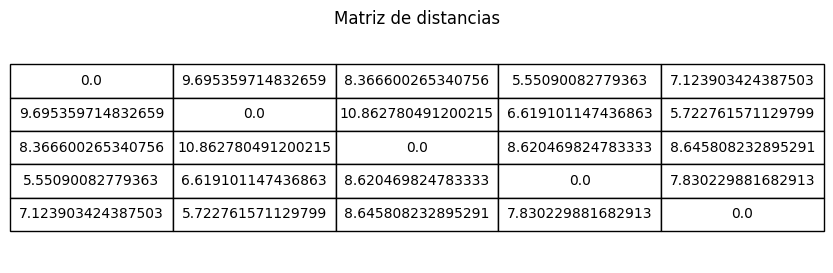


Puntos en esta iteracion:
 [[9.    9.    4.    6.   ]
 [1.    3.    7.    9.   ]
 [3.5   9.    2.5   5.5  ]
 [4.5   4.75  6.625 2.   ]]



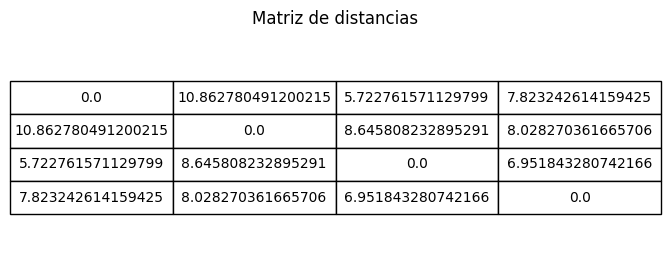


Puntos en esta iteracion:
 [[1.    3.    7.    9.   ]
 [4.5   4.75  6.625 2.   ]
 [6.25  9.    3.25  5.75 ]]



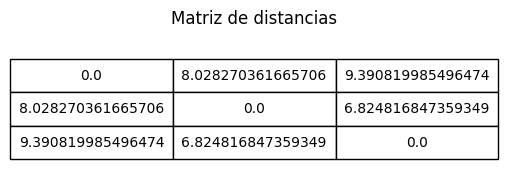


Puntos en esta iteracion:
 [[1.     3.     7.     9.    ]
 [5.375  6.875  4.9375 3.875 ]]



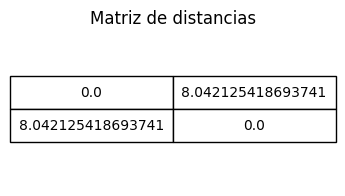


Puntos en esta iteracion:
 [[3.1875  4.9375  5.96875 6.4375 ]]



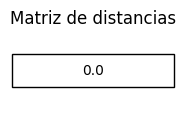

In [54]:
import numpy as np
import matplotlib.pyplot as plt

def showDistMatrix(matrix):
  if len(matrix) == 1:
    rg1 = rg2 = 1
  else:
    rg1 = len(matrix)
    rg2 = (rg1//2) + 1

  fig, ax = plt.subplots(figsize=(rg1, rg2))
  ax.axis('off')
  table = ax.table(cellText=matrix, loc='center', cellLoc='center')
  table.auto_set_font_size(False)
  table.set_fontsize(10)
  table.scale(2.1, 2)
  plt.title('Matriz de distancias')
  plt.show()
  print()

def agrupJerarquico(pts):
  print(f"Puntos en esta iteracion:\n {pts}\n")
  # Se inicializa la matriz de distancia en 0
  matrixDist = np.zeros((len(pts), len(pts)))

  # Condición de parada
  if len(pts) == 1:
    showDistMatrix(matrixDist)
    return pts, matrixDist

  # Se calculan las distancias para esta iteracion
  for i in range(len(pts)):
    for j in range(len(pts)):
      if i != j:
        matrixDist[i][j] = euclideanDistance(pts[i], pts[j])
      else:
        # Sustituimos los 0's de la diagonal principal
        # por NaN para evitar problemas al escoger el mínimo
        matrixDist[i][j] = np.nan

  # Se obtiene la distancia mínima
  minDist = np.nanmin(matrixDist)
  # Se obtienen los índices del mínimo
  minIdx = np.where(matrixDist == minDist)

  # Se actualiza el nuevo punto
  pt1 = pts[minIdx[0][0]]
  pt2 = pts[minIdx[1][0]]
  newPt = (pt1 + pt2) / 2

  # Actualizamos la lista original
  pts = np.delete(pts, [minIdx[0][0], minIdx[1][0]], axis=0)

  # Se retorna la lista nueva y la matriz de distancias
  pts = np.append(pts, newPt.reshape(1, -1), axis=0)
  matrixDist = np.nan_to_num(matrixDist)


  showDistMatrix(matrixDist)
  return agrupJerarquico(pts)

# Ejecución principal
points2 = np.array([
    [2, 10, 3, 7],  #A
    [2, 5, 6, 1],   #B
    [8, 4, 9, 3],   #C
    [5, 8, 2, 4],   #D
    [7, 5, 6, 2],   #E
    [6, 4, 8, 5],   #F
    [9, 9, 4, 6],   #G
    [1, 3, 7, 9]    #H
])

auxPoints = points2.copy()
auxPoints, matrixDist = agrupJerarquico(auxPoints)

1.9.2. Para graficar el dendrogama resultante se hizo uso de [SciPy Dendrogram](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html)

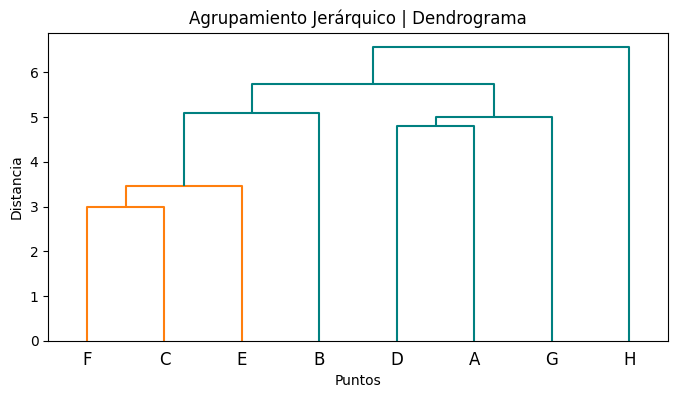

In [55]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(points2, 'single')

plt.figure(figsize=(8, 4))

dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True,
           above_threshold_color='teal',
           labels=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
          )

plt.title("Agrupamiento Jerárquico | Dendrograma")
plt.xlabel("Puntos")
plt.ylabel("Distancia")
plt.show()

1.9.3. Este enfoque se conoce como Bottom-up, es útil cuando no sabemos el número de clusters inicial del conjunto de datos, cuando necesitamos una jerarquía al momento de representar los datos ya que este algoritmo respeta esas relaciones de los datos. En comparación a otros algoritmos, el agrupamiento jerárquico tiende a ser más eficiente cuando trabajamos con datos de baja dimensión.

Un ejemplo de aplicación de este enfoque podría ser el agrupamiento de documentos según el contenido.

## 1.10

Se ha aplicado Análisis de Componentes Principales (PCA) a un conjunto de datos con 10 variables. La matriz de datos ha sido previamente normalizada para garantizar que todas las variables tengan media cero y varianza unitaria.  

Los autovalores obtenidos tras la descomposición en componentes principales son los siguientes:  

$$
\lambda_1 = 0.6, \quad \lambda_2 = 4.5, \quad \lambda_3 = 0.3, \quad \lambda_4 = 2.3, \quad \lambda_5 = 0.05, \quad
\lambda_6 = 0.8, \quad \lambda_7 = 0.2, \quad \lambda_8 = 1.2, \quad \lambda_9 = 0.1, \quad \lambda_{10} = 0.05
$$

### Preguntas:

1. Cuántos componentes principales necesitas conservar para explicar al menos el **85%** de la varianza total?
1. Cuáles son las componentes escogidas?
1. Justifica tu respuesta mostrando el cálculo de la **varianza explicada acumulada**.  

### 1.10  Respuesta

1.10.1. Son necesarios 4 componentes principales.

1.10.2. Los componentes escogidos son:
* $λ_2 = 4.5$
* $λ_4 = 2.3$
* $λ_8 = 1.2$
* $λ_6 = 0.8$

1.10.3. Para esta pregunta se usó [Proporción de varianza explicada](https://cienciadedatos.net/documentos/35_principal_component_analysis#Proporci%C3%B3n_de_varianza_explicada) como fuente y los cálculos realizados fueron:

In [62]:
import numpy as np

autoValores = np.array([0.6, 4.5, 0.3, 2.3, 0.05, 0.8, 0.2, 1.2, 0.1, 0.05])

# Se ordenan los autovalores de mayor a menor
autoValores = np.sort(autoValores)[::-1]

# Varianza explicada por componente
varianzaExplicada = autoValores / np.sum(autoValores)

# Varianza explicada acumulada
varianzaExplicadaAcumulada = np.cumsum(varianzaExplicada)

# Cantidad de componentes que expliquen el 85% de la varianza o más
numComponentes = np.argmax(varianzaExplicadaAcumulada >= 0.85) + 1

# Resultados obtenidos
print(f"Autovalores ordenados:\n{autoValores}\n")
print(f"Varianza explicada por componente:\n{varianzaExplicada}\n")
print(f"Varianza explicada acumulada:\n{varianzaExplicadaAcumulada}\n")
print(f"Se necesitan {numComponentes} componentes para explicar al menos el 85% de la varianza\n")

Autovalores ordenados:
[4.5  2.3  1.2  0.8  0.6  0.3  0.2  0.1  0.05 0.05]

Varianza explicada por componente:
[0.44554455 0.22772277 0.11881188 0.07920792 0.05940594 0.02970297
 0.01980198 0.00990099 0.0049505  0.0049505 ]

Varianza explicada acumulada:
[0.44554455 0.67326733 0.79207921 0.87128713 0.93069307 0.96039604
 0.98019802 0.99009901 0.9950495  1.        ]

Se necesitan 4 componentes para explicar al menos el 85% de la varianza



Podemos ver entonces que con los componentes $λ_2$, $λ_4$, $λ_6$ y $λ_8$ se puede explicar apróximadamente un 87% de la varianza original de nuestro conjunto de datos.

# Parte práctica (20 puntos)

## 2.1. De regreso a semestre 1: Ayudemos a la profe Marlliny!! (3 ptos)

En [discretas 1](https://gecousb.com.ve/guias/GECO/Lo%CC%81gica%20Simbo%CC%81lica%20(CI-2511)/Gui%CC%81as%20(CI-2511)/CI-2511%20Gui%CC%81a%20de%20Monsalve%20UCV.pdf), aprendimos que dos proposiciones $p$ y $q$ son lógicamente equivalentes (denotado como $$p \Leftrightarrow q $$ o $$p \equiv q$$ si la preposición $p \leftrightarrow q$ es una tautología.

Aprendimos muchos métodos para demostrar equivalencias pero la Prof. Marlliny nos pide por favor que la ayuden con el ejemplo 3.5 de la subsección 3.3 del capítulo 3.

$$
\text { Demuestre que } \neg[\neg(p \vee r) \vee r] \vee \neg(q \rightarrow r) \equiv(p \vee q) \wedge \neg r \text {. }
$$

Nos pide por favor implementar la Threshold Logic Unit. Por suerte, no necesitamos entrenar la red en este caso: solo definir la función principal y sus componentes.

Recordemos que fue el primer modelo mátematico usando neuronas con entradas booleanas:
$$
f(x)=\mathbf{1}_{\left\{ \sum_i w_i x_i+b \geq 0\right\}} .
$$

Y usando los siguientes operadores podemos implementar literalmente cualquier función booleana:

$$
\begin{aligned}
\operatorname{or}(u, v) & =\mathbf{1}_{\{u+v-0.5 \geq 0\}} & (w=1, b=-0.5) \\
\text { and }(u, v) & =\mathbf{1}_{\{u+v-1.5 \geq 0\}} & (w=1, b=-1.5) \\
\operatorname{not}(u) & =\mathbf{1}_{\{-u+0.5 \geq 0\}} & (w=-1, b=0.5)
\end{aligned}
$$

1. Implemente usando **solamente** funciones en PyTorch los métodos en la siguiente celda.
1. Puede usar flotantes, enteros o booleans.


In [2]:
import torch

def threshold_logic_unit(x, w, b):
  # Implementación
  return (torch.sum(w * x) + b > 0).float()

def logic_not(x):
  # Implementación
  return (-x + 0.5 > 0).float()

def logic_or(x, y):
  # Implementación
  return (x + y - 0.5 > 0).float()

def logic_and(x, y):
  # Implementación
  return (x + y - 1.5 > 0).float()

def logic_implies(x, y):
  # Implementación
  # p → q equivale a ¬p ∨ q por leyes de equivalencia
  return logic_or(logic_not(x), y)

def f(p, q, r):
  # ¬[¬(p ∨ r) ∨ r] ∨ ¬(q → r)
  proposicion1 = logic_or(logic_not(logic_or(logic_not(logic_or(p, r)), r)), logic_not(logic_implies(q, r)))
  # (p ∨ q) ∧ ¬r
  proposicion2 = logic_and(logic_or(p, q), logic_not(r))

  return torch.equal(proposicion1, proposicion2)

In [3]:
# Prueba de la función
for p in [1.0, 0.0]:
    for q in [1.0, 0.0]:
        for r in [1.0, 0.0]:
           print(f"f({p}, {q}, {r}) = {f(torch.tensor(p), torch.tensor(q), torch.tensor(r))}")

f(1.0, 1.0, 1.0) = True
f(1.0, 1.0, 0.0) = True
f(1.0, 0.0, 1.0) = True
f(1.0, 0.0, 0.0) = True
f(0.0, 1.0, 1.0) = True
f(0.0, 1.0, 0.0) = True
f(0.0, 0.0, 1.0) = True
f(0.0, 0.0, 0.0) = True


Observando los resultados obtenidos, se tiene que la las proposiciones son lógicamente equivalentes.

### Extra operators (2ptos)

Implemente los operadores $\oplus$ y $\leftrightarrow$ y consiga la tabla de verdad de la siguiente expresión usando una red con TLU.

$$
\neg(p \vee \displaystyle [(q \rightarrow r) \oplus (s \leftrightarrow p)])
$$

1. $\oplus$ es el operador XOR
1. $\leftrightarrow$ el operador "si y solo si"

In [4]:
def logic_iff(x, y):
  # Implementación
  return logic_and(logic_implies(x, y), logic_implies(y, x))

def logic_xor(x, y):
  # Implementación
  return logic_or(logic_and(logic_not(x), y), logic_and(x, logic_not(y)))

def f(p, q, r, s):
  # ¬(p ∨ [(q → r) ⊕ (s ↔ p)])
  return logic_not(logic_or(p, logic_xor(logic_implies(q, r), logic_iff(s, p)))).bool()

In [5]:
# Prueba de la función
for p in [1.0, 0.0]:
    for q in [1.0, 0.0]:
        for r in [1.0, 0.0]:
            for s in [1.0, 0.0]:
              print(f"f({p}, {q}, {r}, {s}) = {f(torch.tensor(p), torch.tensor(q), torch.tensor(r), torch.tensor(s))}")

f(1.0, 1.0, 1.0, 1.0) = False
f(1.0, 1.0, 1.0, 0.0) = False
f(1.0, 1.0, 0.0, 1.0) = False
f(1.0, 1.0, 0.0, 0.0) = False
f(1.0, 0.0, 1.0, 1.0) = False
f(1.0, 0.0, 1.0, 0.0) = False
f(1.0, 0.0, 0.0, 1.0) = False
f(1.0, 0.0, 0.0, 0.0) = False
f(0.0, 1.0, 1.0, 1.0) = False
f(0.0, 1.0, 1.0, 0.0) = True
f(0.0, 1.0, 0.0, 1.0) = True
f(0.0, 1.0, 0.0, 0.0) = False
f(0.0, 0.0, 1.0, 1.0) = False
f(0.0, 0.0, 1.0, 0.0) = True
f(0.0, 0.0, 0.0, 1.0) = False
f(0.0, 0.0, 0.0, 0.0) = True


## 2.2. TypesSignMnist (5 ptos)

Modifique el ejercicio del notebook 10 "Ejemplo avanzado con SignMnist" donde el problema a resolver es "Clasificar consonantes de vocales"

1. Investigue y luego identifique cuál es la mejor función de pérdida para este problema. Explique con sus palabras, con formalidad moderada, de dónde proviene la misma.
1. Explique detalladamente qué consecuencia hay en el cambio de decisión sobre el clasificador desde el punto de vista de los datos de entrada.
1. Cómo intentarían resolver este inconveniente?
1. Use curvas ROC para analizar los resultados del nuevo clasificador.

2.2.1. Respuesta

Para responder a esta pregunta, se hizo uso de la documentación de [Loss Functions](https://pytorch.org/docs/stable/nn.html#loss-functions) de PyTorch, dado que estamos en un problema de clasificación binaria, nuestra función de pérdida debe ser [BCE - Binary Cross Entropy / Log Loss](https://www.geeksforgeeks.org/binary-cross-entropy-log-loss-for-binary-classification/) la cual se define como:


$BCE = - \frac{1}{N} \sum_{i=1}^{N} [(y_i) log(p_i) + (1 - y_i) log(1 - p_i)]$


Dado que estamos en clasificación binaria, se tienen los términos $y_i$ y $(1 - y_i)$ que representan las clases de nuestros datos, pueden verse como clase positiva y negativa. Estos términos determinan que penalidad se aplicará en la suma.

Por penalidad nos referimos a $log(p_i)$ y $log(1 - p_i)$, siendo $p_i$ la probabilidad de que una instancia pertenezca a la clase $y_i$, esta probabilidad es calculada por el modelo, es por ello que se usa el $log()$, más detalladamente tenemos:

Si estamos ante un perteneciente a la clase $y_i = 1$, nuestra función tiene la forma:


$BCE = - \frac{1}{N} \sum_{i=1}^{N} [(1) log(p_i)]$


Si el valor $p_i$ calculado por el modelo es muy bajo, es decir, se tiene una baja probabilidad de que la instacia sea de la clase $y_i$ cuando realmente lo es, estamos ante una predicción errónea, en ese caso, el $log(p_i)$ será un resultado relativamente alto, esto ayudará al modelo a dar un paso mayor en dirección a una mejor predicción.

De forma análoga para el caso $y_i = 0$ se "activa" la otra sección de la función, es decir:


$BCE = - \frac{1}{N} \sum_{i=1}^{N} [(1) log(1 - p_i)]$


Sabiendo que $p_i$ es la probabilidad de que un punto o instancia de datos pertenezca a la clase $y_i$, en este caso se espera que el modelo obtenga un valor cercano a 0, dado que el punto pertenece a la clase $(1 - y_i)$, por lo que si la predicción es errónea se tiene que $p_i ≈ 1$ dando como resultado una penalidad grande para el modelo.

En el caso de PyTorch, existen 2 implementaciones de esta función: [BCELoss](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html#torch.nn.BCELoss) y [BCEWithLogitsLoss](https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html#torch.nn.BCEWithLogitsLoss), la principal diferencia entre ambas es que la primera requiere aplicar una función sigmoide en la capa de salida de la red para que los resultados sean valores entre 0 y 1, mientras que la segunda ya posee este comportamiento, esto la hace más estable numéricamente, es por ello que para resolver el problema de clasificación haremos uso de la 2da implementación.

Referencias adicionales:
* [Understanding Binary Cross-Entropy / Log Loss in 5 minutes: a visual explanation](https://www.youtube.com/watch?v=DPSXVJF5jIs)
* [Neural Networks Part 6: Cross Entropy](https://www.youtube.com/watch?v=6ArSys5qHAU)

2.2.2. Respuesta

En lugar de 24 clases, ahora estamos en un problema de clasificación binaria por lo que la representación de las clases en el conjunto de datos es más simple (en lugar de tener valores de 0 a 23, o tener 24 columnas en caso de usar OneHotEncoder, podemos representar las clases como 0 o 1, 1 o -1, etc), al mismo tiempo se modifica la salida del modelo, con CrossEntropyLoss se tiene la probabilidad de que el dato pertenezca a una de las 24 clases usando una función de activación softmax, mientras que acá se hace uso de la función sigmoide para que la salida sea la probabilidad de que el dato pertenezca a la clase positiva. Por último, se tiene un mayor desbalance en los datos, puesto que antes se tenían instancias similares para cada una de las clases pero ahora que las clases son vocales o consonantes, es natural que tengamos muchas más instancias consonantes que vocales.

2.2.3. Respuesta

Si bien existen múltiples opciones como hacer Oversampling de la clase minoritaria, es decir, generar más muestras de vocales; o hacer undersampling, análogamente consiste en eliminar instancias de la clase mayoritaria, para este caso haremos uso del atributo pos_weigth de la función de pérdida, lo que nos permite asignarle un peso a las vocales y puede calcularse como:

`pos_weight = torch.tensor([(numero_consonantes) / (numero_vocales)])`

2.2.4. Respuesta

In [51]:
# Librerías necesarias
import torch
import requests
import numpy as np
import pandas as pd
import torch.nn as nn
import matplotlib.pyplot as plt

from io import StringIO
from torch.optim import Adam
from torch.utils.data import Dataset, DataLoader

In [52]:
# Descarga de los datos
csv_train = "https://raw.githubusercontent.com/ucvia/ml-pregrado-parcial-02-2024/refs/heads/main/sign_mnist_train.csv"
csv_test = "https://raw.githubusercontent.com/ucvia/ml-pregrado-parcial-02-2024/refs/heads/main/sign_mnist_test.csv"

try:
  response = requests.get(csv_train)
  response.raise_for_status()
  train_df = pd.read_csv(StringIO(response.text))

  response = requests.get(csv_test)
  response.raise_for_status()
  test_df = pd.read_csv(StringIO(response.text))

except Exception as e:
  print(f"Ha ocurrido un error: {e}")

In [53]:
# Inspección de los datos de entrenamiento
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [54]:
# Inspección de los datos de prueba
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


Vamos a modificar la columna 'label' de manera que nos indique 1 si la letra es una vocal o 0 si es consonante:

In [55]:
def esVocal(x):
  vocales = [0, 4, 8, 14, 20]

  if x in vocales:
    return 1
  else:
    return 0

train_df['is_vowel'] = train_df['label'].apply(esVocal)
test_df['is_vowel'] = test_df['label'].apply(esVocal)

train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,is_vowel
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,206,206,206,204,203,202,0
1,6,155,157,156,156,156,157,156,158,158,...,149,128,87,94,163,175,103,135,149,0
2,2,187,188,188,187,187,186,187,188,187,...,201,200,199,198,199,198,195,194,195,0
3,2,211,211,212,212,211,210,211,210,210,...,234,233,231,230,226,225,222,229,163,0
4,13,164,167,170,172,176,179,180,184,185,...,105,105,108,133,163,157,163,164,179,0


In [56]:
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,is_vowel
0,6,149,149,150,150,150,151,151,150,151,...,148,127,89,82,96,106,112,120,107,0
1,5,126,128,131,132,133,134,135,135,136,...,104,194,183,186,184,184,184,182,180,0
2,10,85,88,92,96,105,123,135,143,147,...,166,242,227,230,227,226,225,224,222,0
3,0,203,205,207,206,207,209,210,209,210,...,248,247,248,253,236,230,240,253,255,1
4,3,188,191,193,195,199,201,202,203,203,...,40,64,48,29,46,49,46,46,53,0


In [ ]:
class SignMNIST(Dataset):
    def __init__(self, x_df, y_df, device="cuda"):
        self.device = torch.device("cuda" if torch.cuda.is_available() and device == "cuda" else "cpu")
        self.xs = torch.tensor(x_df).float().to(self.device)
        self.ys = torch.tensor(y_df).to(self.device)

    def __getitem__(self, idx):
        x = self.xs[idx]
        y = self.ys[idx]
        return x, y

    def __len__(self):
        return len(self.xs)

In [ ]:
BATCH_SIZE = 32

train_data = SignMNIST(x_train, y_train)
train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
train_N = len(train_loader.dataset)

valid_data = SignMNIST(x_valid, y_valid)
valid_loader = DataLoader(valid_data, batch_size=BATCH_SIZE)
valid_N = len(valid_loader.dataset)
batch = next(iter(train_loader))

input_size = 28 * 28
n_classes = 2

In [ ]:
linear_model = nn.Sequential(
    nn.Flatten(), # Tiene la capa flatten
    nn.Linear(input_size, 512),  # La entrada es densa y contiene 512 neuronas
    nn.ReLU(),  # Usamos la función de activación ReLU
    nn.Linear(512, 512),  # Capa oculta
    nn.ReLU(),  # Activación para capa oculta
    nn.Linear(512, n_classes)
)

In [ ]:
linear_model = torch.compile(linear_model.to(device))

loss_function = nn.BCEWithLogitsLoss()
optimizer = Adam(linear_model.parameters())

def get_batch_accuracy(output, y, N, debug=False):
    if debug:
      print(y, N)
    pred = output.argmax(dim=1, keepdim=True)
    correct = pred.eq(y.view_as(pred)).sum().item()
    return correct / N

In [ ]:
def train():
    loss = 0
    accuracy = 0

    linear_model.train()
    for x, y in train_loader:
        output = linear_model(x)
        optimizer.zero_grad()
        batch_loss = loss_function(output, y)
        batch_loss.backward()
        optimizer.step()

        loss += batch_loss.item()
        accuracy += get_batch_accuracy(output, y, train_N)
    print('Train - Loss: {:.4f} Accuracy: {:.4f}'.format(loss, accuracy))

In [ ]:
def validate():
    loss = 0
    accuracy = 0

    linear_model.eval()
    with torch.no_grad():
        for x, y in valid_loader:
            output = linear_model(x)
            loss_value = loss_function(output, y).item()
            if np.isnan(loss_value):
              continue
            loss += loss_function(output, y).item()
            accuracy += get_batch_accuracy(output, y, valid_N)
    print('Valid - Loss: {:.4f} Accuracy: {:.4f}'.format(loss, accuracy))

In [ ]:
epochs = 20
for epoch in range(epochs):
    print('Epoch: {}'.format(epoch))
    train()
    validate()



## Tarea 1: Reloaded!!!

Con los conocimientos adquiridos de Redes Neuronales y Redes Neuronales Convolucionales vamos a comparar el rendimiento de los modelos escogidos en la Tarea 1, usando el dataset MNIST y el customizable de signos. Deberá implementar 2 clases de modelos como sigue:

### CustomShallowNN

Construya un modelo sin usar capas convolucionales donde sea posible modificar la red neuronal con parámetros como:

1. $p$: Número de neuronas de entrada
1. $N$: Número de capas ocultas
1. $N_i$: Número de neuronas de la capa $i$
1. Función de activación customizable

### CustomCNN

Construya un modelo usando capas convolucionales donde sea posible modificar la red neuronal con parámetros como:
1. Investigue y luego identifique cuál es la mejor función de pérdida para este problema. Explique con sus palabras, con formalidad moderada, de dónde proviene la misma.
1. $L$:  Número de submódulos de capas convolucionales
  - Un submódulo de capa convolucional es una combinación concurrente de las siguientes capas:
    * Conv2d
    * BatchNorm2d
    * MaxPool2d
1. La capa de clasificación es una CustomShallowNN
1. Función de activación customizable

### Discusión

1. Haga un estudio donde compare el rendimiento de los nuevos modelos versus los escogidos en su tarea 1. Este estudio comparativo debe incluir:
  1. Curvas de validación dependiendo de los parámetros $N$, $N_i$ y $L$
  1. Curvas de aprendizaje variando el número de datos disponible.
    - Tienen libertad de escoger el número de datos siempre que comparen al menos 5 cardinalidades
1. **Puntos extra**: Use y grafique resultados usando [MulticlassAUROC](https://pytorch.org/torcheval/stable/generated/torcheval.metrics.MulticlassAUROC.html) por qué cree es útil en este caso? Por qué no?



In [ ]:
# Respuesta